## Restricted Boltzmann Machine: example

In [1]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data

In [2]:
fname = 'dataRBM_q0.1.csv'
# loading data: each row is a list of visible units
data = np.loadtxt(fname, delimiter=',', dtype=int)
# to start, take a small subsample
# v = v[0:10]
N = len(data)
L = len(data[1])
print(f'each of N = {N} data has a L = {L} digits')

each of N = 10000 data has a L = 8 digits


### Convert data to +1/-1 (spins)

In [3]:
# convert 0,1 -> -1,1 (spin system)
v = 2*data - 1
# store in v0, because later we will shuffle v
v0 = np.zeros_like(v)
v0[:] = v[:]

for k in range(10):
    print(data[k], v[k])
print('...')

[0 0 1 1 0 0 1 1] [-1 -1  1  1 -1 -1  1  1]
[0 0 1 1 0 0 1 1] [-1 -1  1  1 -1 -1  1  1]
[0 0 1 1 0 1 0 0] [-1 -1  1  1 -1  1 -1 -1]
[1 0 1 1 0 1 1 1] [ 1 -1  1  1 -1  1  1  1]
[0 0 1 1 1 1 0 0] [-1 -1  1  1  1  1 -1 -1]
[0 0 1 1 1 1 0 0] [-1 -1  1  1  1  1 -1 -1]
[1 1 0 0 0 0 1 0] [ 1  1 -1 -1 -1 -1  1 -1]
[1 0 1 1 0 0 1 1] [ 1 -1  1  1 -1 -1  1  1]
[0 1 1 1 0 0 1 1] [-1  1  1  1 -1 -1  1  1]
[1 0 0 0 1 1 0 0] [ 1 -1 -1 -1  1  1 -1 -1]
...


### Initialize arrays and parameters

In [4]:
# random seed for reproducibility
np.random.seed(12342)
# RBM, nr of hidden units
M = 2
# range of each initial weights
sigma = np.sqrt(4./float(L+M))
# initial weights (see literature, e.g. page 98, but here not Gaussian)
w = sigma*(2*np.random.rand(L,M) - 1)
a = sigma*(2*np.random.rand(L) - 1)
b = np.zeros(M)
print(w)
print(a)
print(b)
# store initial weights
w0, a0, b0 = w, a, b

[[ 0.2312481  -0.1921846 ]
 [ 0.41981402 -0.35446294]
 [-0.08209399 -0.16087596]
 [-0.39923633 -0.55184291]
 [ 0.21317147 -0.16707938]
 [ 0.59531317 -0.01861671]
 [-0.02474645  0.03761957]
 [ 0.54715523  0.56265455]]
[-0.55847423 -0.61468609 -0.31559158  0.59231902 -0.46253863 -0.08086142
  0.20653201 -0.1123049 ]
[0. 0.]


### Functions for Plotting

[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


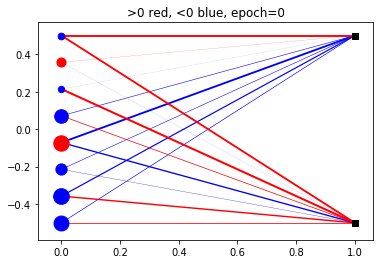

In [5]:
# line-up layers vertically
def create_coord(np, x0):
    x = [x0]*np
    print(x)
    y = list(range(np))
    for i in range(np):
        y[i] = y[i]/(np-1.)-0.5
    return (x,y)

(x1, y1) = create_coord(L,0)
(x2, y2) = create_coord(M,1)

# choose color according to sign
def mycolor(val):
    if val>0:
        return 'red'
    elif val<0:
        return 'blue'
    else:
        return 'black'

def plotgraph(epoch=0):
    # zorder --> scatter plot of dots on top of lines
    # A: make max line width = 2
    A = 2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]), (y1[i],y2[j]), mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*np.abs(w[i][j]))
    
    # PS: scale of the point size
    PS = 400.
    PSmin = 40
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=max(PSmin, PS*np.abs(a[i])), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        plt.scatter(x2[j], y2[j], s=max(PSmin, PS*np.abs(b[j])), zorder=2, c=mycolor(b[j]), marker='s')
    
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()

plotgraph()

### Sigmoid function

In [6]:
# eq(213) page 97
# activation via sigmoid
def activate(v_in, wei, bias, info=False):
    act = np.dot(v_in, wei) + bias
    prob = 1./(1. + exp(-act))
    n = np.shape(act)
    # a list on -1's
    v_out = -np.ones(n, dtype=int)
    # activate the 1's with probability prob
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print('input = ', v_in)
        print('act = ', act)
        print('prob = ', prob)
        print('output = ', v_out)
    return v_out

k = 0
activate(v[k], w, b, info=True)

input =  [-1 -1  1  1 -1 -1  1  1]
act =  [-1.4184683   0.61989888]
prob =  [0.19490182 0.65019555]
output =  [-1  1]


array([-1,  1])

### RBM Train

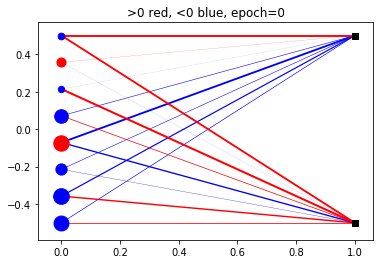

----------epoch =  1  k =  499  m =  500
dw =  [[ 0.0296  0.0132]
 [ 0.0148  0.0168]
 [-0.0316  0.0008]
 [-0.016   0.0156]
 [-0.0108 -0.0208]
 [-0.0064 -0.0268]
 [ 0.0016  0.0188]
 [-0.0244  0.0048]]
da =  [ 0.0192  0.0244  0.0164 -0.0304  0.0284 -0.0024 -0.0152  0.0076]
db =  [ 0.016  -0.0036]
completed epoch 1  with l_rate =  0.1


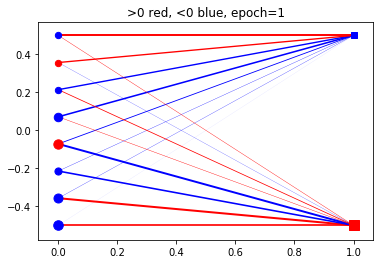

----------epoch =  2  k =  499  m =  500
dw =  [[ 0.02784314  0.00392157]
 [ 0.02        0.01254902]
 [-0.02862745  0.01019608]
 [-0.02784314  0.01176471]
 [-0.00392157 -0.02705882]
 [-0.00627451 -0.03490196]
 [ 0.00156863  0.04039216]
 [-0.01098039  0.02705882]]
da =  [ 0.00941176  0.          0.00784314 -0.01098039  0.00980392  0.00901961
 -0.00117647  0.00509804]
db =  [ 0.0027451  -0.00313725]
completed epoch 2  with l_rate =  0.09803921568627451


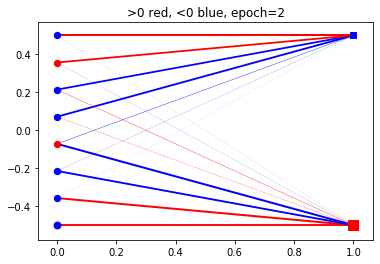

completed epoch 3  with l_rate =  0.09615384615384616


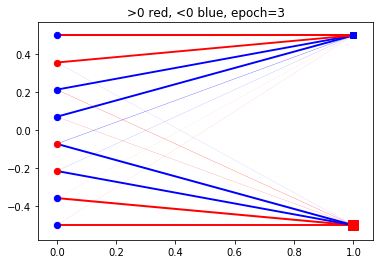

completed epoch 4  with l_rate =  0.09433962264150944


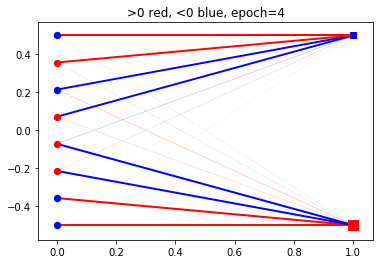

completed epoch 5  with l_rate =  0.0925925925925926


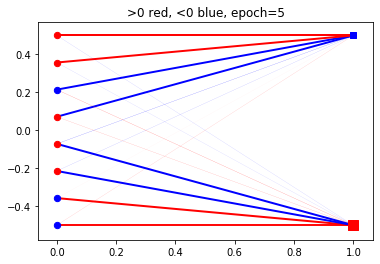

completed epoch 6  with l_rate =  0.09090909090909091


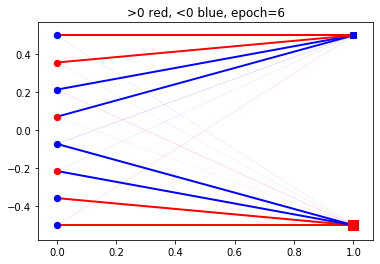

completed epoch 7  with l_rate =  0.0892857142857143


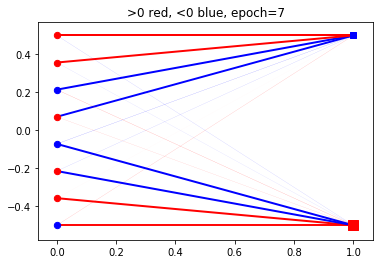

completed epoch 8  with l_rate =  0.08771929824561406


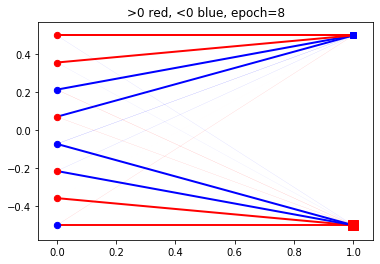

completed epoch 9  with l_rate =  0.08620689655172416


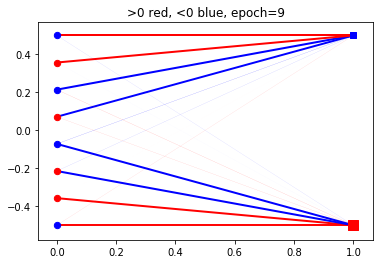

completed epoch 10  with l_rate =  0.08474576271186443


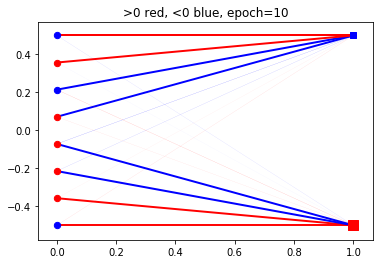

completed epoch 11  with l_rate =  0.08333333333333336


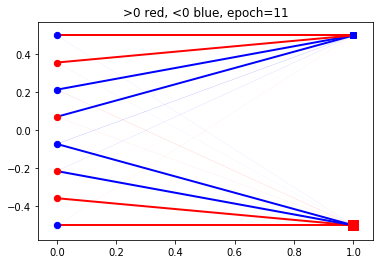

completed epoch 12  with l_rate =  0.08196721311475412


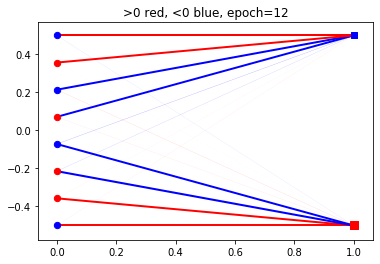

completed epoch 13  with l_rate =  0.0806451612903226


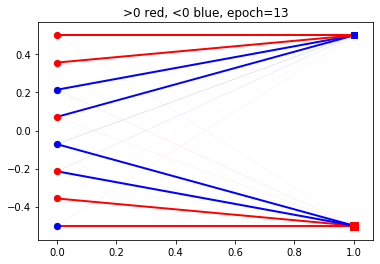

completed epoch 14  with l_rate =  0.07936507936507939


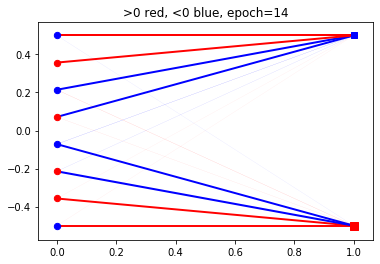

completed epoch 15  with l_rate =  0.07812500000000003


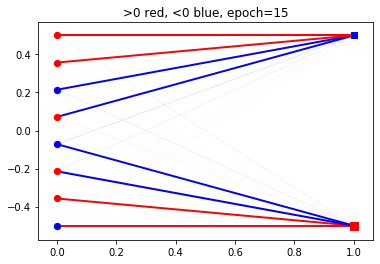

completed epoch 16  with l_rate =  0.07692307692307696


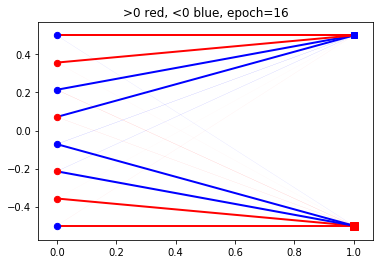

completed epoch 17  with l_rate =  0.07575757575757579


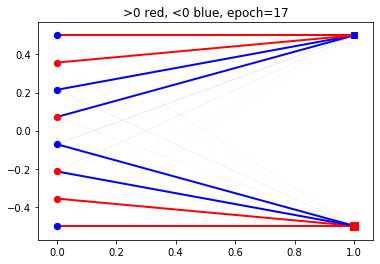

completed epoch 18  with l_rate =  0.07462686567164183


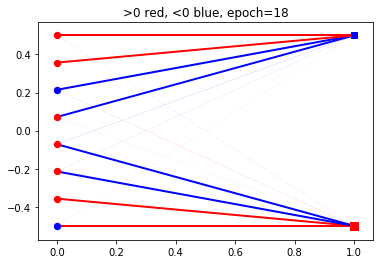

completed epoch 19  with l_rate =  0.07352941176470591


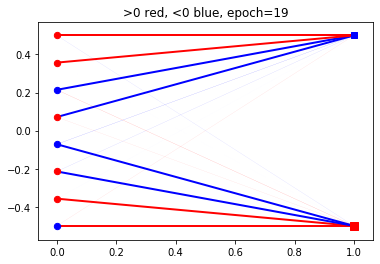

completed epoch 20  with l_rate =  0.07246376811594206


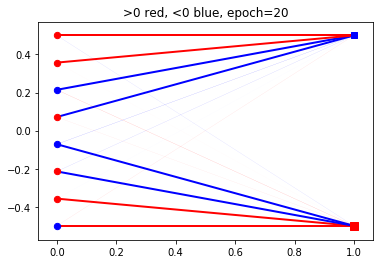

In [7]:
plotgraph(0)

# learning rate
l_rate = 0.1

# minibatch size (mini) and index (m=0,1,...,mini-1)
mini, m = 500, 0
# number of epochs
max_epoch = 20

# train model
for epoch in range(1, max_epoch+1):
    l_rate_m = l_rate/mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L,M)), np.zeros((L,M))
        
        # positive CD phase: generating h
        h = activate(v[k], w, b)
        # negative CD phase: generating fantasy vf
        vf = activate(h, w.T, a)
        # one more positive CD phase: generating fantasy h from fantasy vf
        hf = activate(vf, w, b)
        
        v_data   += v[k]
        v_model  += vf
        h_data   += h
        h_model  += hf
        vh_data  += np.outer(v[k].T, h)
        vh_model += np.outer(vf.T, hf)
        
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # vanilla gradient descent method
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=2 and k<=mini:
                print('----------epoch = ', epoch, ' k = ', k, ' m = ', m)
                print('dw = ', dw)
                print('da = ', da)
                print('db = ', db)
            # basic step of vanilla gradient descent, form eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    print('completed epoch', epoch, ' with l_rate = ', l_rate)
    
    # randomize the order of input data
    np.random.shuffle(v)
    # let the learning rate decay as epoch -1
    l_rate = l_rate / (0.2*l_rate+1)
    # if epoch%10==0:
    plotgraph(epoch)

### Denoising (?)

In [8]:
# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h
    h = activate(v0[k], w, b)
    # negative CD phase: generating fantasy vf
    v1[k] = activate(h, w.T, a)
# difference between fantasy and data
diff = (v1-v0)/2
str0 = 'M'+str(M)+'-mini'+str(mini)+fname
np.savetxt('fant-'+str0, (v1+1)/2, fmt='%d', delimiter=',')
np.savetxt('diff-'+str0, diff, fmt='%d', delimiter=',')

Z = int(L/4)
vv0 = [0]*Z
vv1 = [1]*Z
case = (vv1 + vv0 + vv1 + vv0,
        vv0 + vv1 + vv1 + vv0,
        vv1 + vv0 + vv0 + vv1,
        vv0 + vv1 + vv0 + vv1)

for k in range(10):
    vec0 = ((v0[k]+1)/2).astype(int)
    vec1 = ((v1[k]+1)/2).astype(int)
    is0  = (vec1==case[0]).all()
    is1  = (vec1==case[1]).all()
    is2  = (vec1==case[2]).all()
    is3  = (vec1==case[3]).all()
    print(vec0, vec1, (is0 or is1 or is2 or is3))
print('...')

[0 0 1 1 0 0 1 1] [0 0 1 1 0 0 1 0] False
[0 0 1 1 0 0 1 1] [1 0 1 1 0 0 1 1] False
[0 0 1 1 0 1 0 0] [0 1 1 1 1 0 0 0] False
[1 0 1 1 0 1 1 1] [0 0 1 1 0 0 1 1] True
[0 0 1 1 1 1 0 0] [0 0 0 1 0 1 0 0] False
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0] True
[1 1 0 0 0 0 1 0] [1 0 0 0 0 0 1 1] False
[1 0 1 1 0 0 1 1] [0 0 1 1 0 0 1 0] False
[0 1 1 1 0 0 1 1] [0 0 1 1 0 0 1 1] True
[1 0 0 0 1 1 0 0] [1 1 0 0 1 0 0 0] False
...
